In [1]:
# Pour que les changements dans les modules importés soient pris en compte
%load_ext autoreload
%autoreload 2
# Pour afficher les figures dans le notebook
%matplotlib inline

In [2]:
from functions import *

In [3]:
import sys, os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.metrics import confusion_matrix, classification_report, cohen_kappa_score

In [5]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = 20, 10
mpl.rcParams['lines.linewidth'] = 4
mpl.rcParams['font.size'] = 24
mpl.rcParams['lines.markersize'] = 15
mpl.rcParams['axes.grid'] = True

In [8]:
project_path = "../HMAD/projects/AA0075/OPENFACE"
ofo_path = os.path.join(project_path, "processed", "AA0075_ofo.csv")
nods_path = "../UEDialogue2020-SR/AnnotationsNods/AA0075_FML_MP_simplified_nod.txt"
pyr_path = os.path.join(project_path, "tables", "itdcomplete.txt")
au_path = os.path.join(project_path, "tables", "audf.txt")

## Data Import

In [9]:
nods = pd.read_csv(nods_path, sep="\t")
nods.head()

,tmin,tmax,annot,value
0,3.610,4.750,Complexe,Nod
1,7.780,8.640,Nod,Nod
2,9.280,10.080,Complexe,Nod
3,12.520,14.550,Nod,Nod
4,19.825,22.025,Nod,Nod


In [10]:
nods.groupby(by=['annot', 'value']).count()

,,tmin,tmax
annot,value,,
Backward,No_nod,2,2
Complexe,Nod,9,9
Froncement de sourcils,No_nod,12,12
Haussement de sourcils,No_nod,1,1
Nod,Nod,19,19
Tilt,No_nod,1,1


In [11]:
pyr = pd.read_csv(pyr_path, sep="\t")
pyr.head()

,frame,time,timem,times,confidence,pitch,yaw,roll,MOx,MOy,...,rP65y,rP66x,rP66y,rP67x,rP67y,rP68x,rP68y,eaX,eaY,gde
0,1,0.00,0,0.00,0.98,-6.0161,5.6150,2.2345,852.5146,555.0926,...,-0.3212,-0.2228,0.7368,-0.1370,0.7757,-0.1604,0.8427,0.9998,1.0011,1.625166
1,2,0.04,0,0.04,0.98,-6.0734,4.1826,2.7502,853.1868,555.0756,...,-0.3221,0.4100,0.5190,0.4083,0.3917,0.5352,0.4064,0.9966,1.0024,1.614559
2,3,0.08,0,0.08,0.98,-5.6150,5.2139,1.0886,853.7894,555.3585,...,-0.3257,-0.5958,0.5826,-0.4135,0.4554,-0.1066,0.4617,0.9932,0.9945,1.045137
3,4,0.12,0,0.12,0.98,-5.7296,4.5264,2.0054,852.8113,555.8667,...,-0.2983,-0.2241,0.4778,-0.0338,0.4449,0.2901,0.4549,0.9941,0.9978,1.272294
4,5,0.16,0,0.16,0.98,-5.4431,5.2139,0.8594,853.1889,556.6610,...,-0.4044,-0.7120,0.5346,-0.5328,0.5334,-0.2235,0.4676,0.9927,0.9934,1.041203


## Plot transforms

In [12]:
## Define the limits for the 2 dimensional plot
smin = 0.16
smax = 1.04
step = 0.08

In [13]:
dresult = compute2DArrayPredictor2Value(pyr, 'pitch', smin, smax, step, use_index=True)

Scale 1 completed, timescale = 0.16s.
Scale 2 completed, timescale = 0.24s.
Scale 3 completed, timescale = 0.32s.
Scale 4 completed, timescale = 0.4s.
Scale 5 completed, timescale = 0.48s.
Scale 6 completed, timescale = 0.56s.
Scale 7 completed, timescale = 0.64s.
Scale 8 completed, timescale = 0.72s.
Scale 9 completed, timescale = 0.8s.
Scale 10 completed, timescale = 0.88s.
Scale 11 completed, timescale = 0.96s.
Scale 12 completed, timescale = 1.04s.


In [14]:
# For comparison with R
#dresult.to_excel('python_results.xlsx', index=False)

In [15]:
d2 = dresult[(dresult.time <= 16) & (dresult.time >=12)]

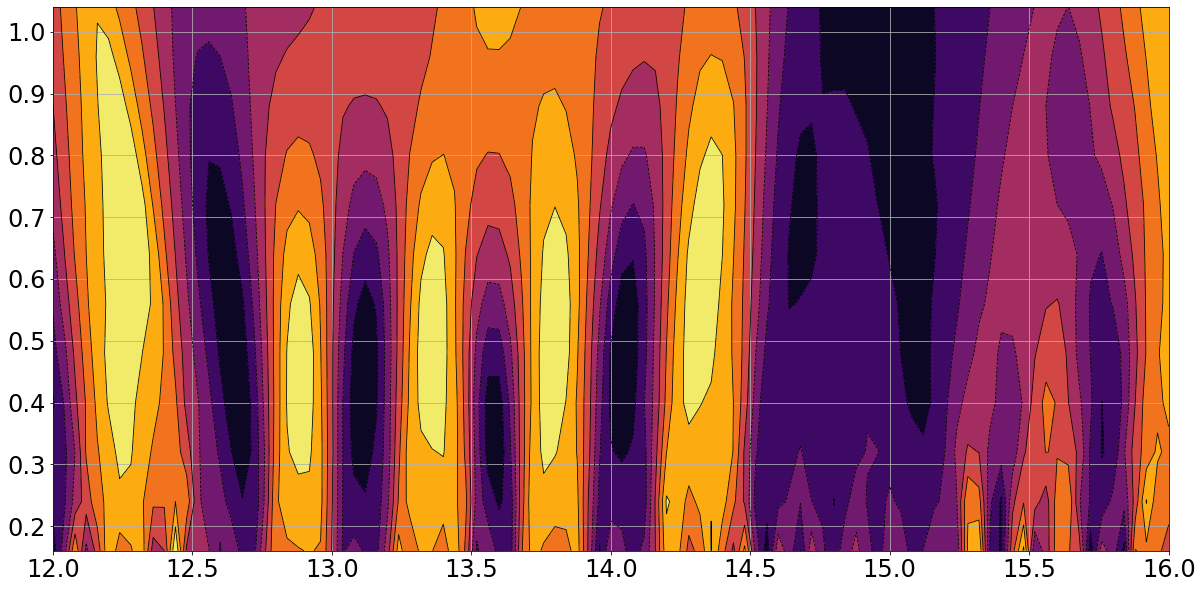

In [16]:
cs = plt.contourf(d2.time.unique(), d2.duration.unique(), d2.pivot('duration', 'time', 'wgof'), cmap='inferno')
plt.contour(cs, colors='k', linewidths=0.8)
plt.show()

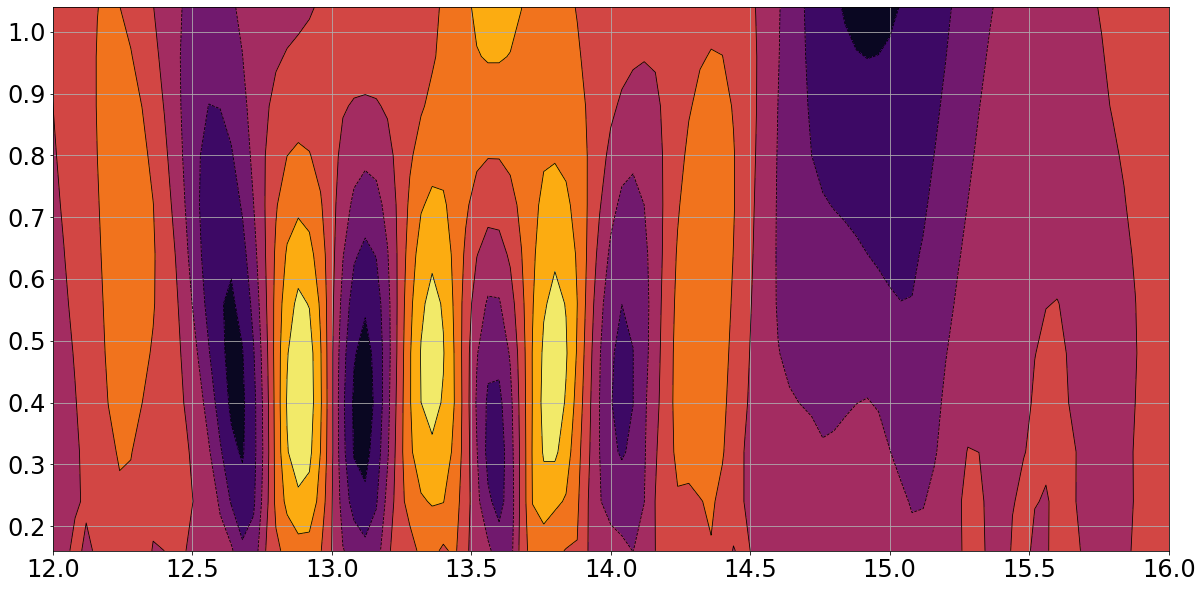

In [17]:
cs = plt.contourf(d2.time.unique(), d2.duration.unique(), d2.pivot('duration', 'time', 'wcoef'), cmap='inferno')
plt.contour(cs, colors='k', linewidths=0.8)
plt.show()

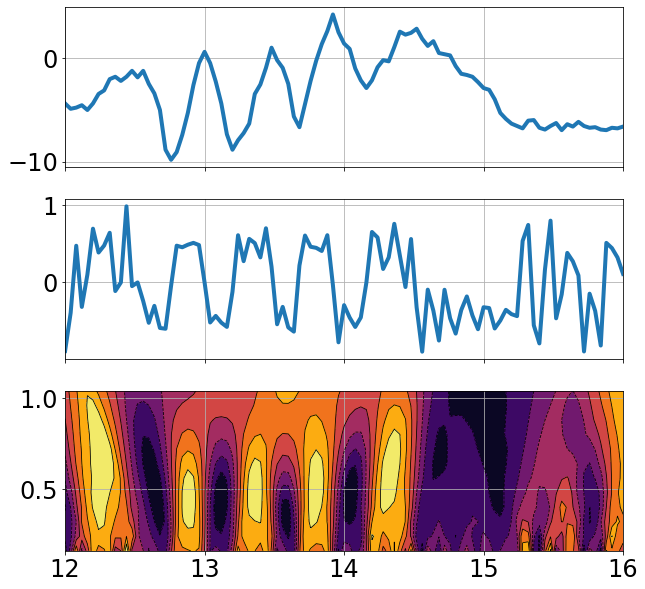

In [18]:
fig, ax = plt.subplots(3,1, figsize=(10,10), sharex=True)
#
ax[0].plot(d2[d2.duration == 0.16]['time'], d2[d2.duration == 0.16]['pitch'])
ax[1].plot(d2[d2.duration == 0.16]['time'], d2[d2.duration == 0.16]['wgof'])
#
cs = ax[2].contourf(d2.time.unique(), d2.duration.unique(), d2.pivot('duration', 'time', 'wgof'), cmap='inferno')
ax[2].contour(cs, colors='k', linewidths=0.8)
plt.show()

Comparison `wgof` / `wcoef`

In [20]:
dresult[['wgof', 'wcoef']].describe()

,wgof,wcoef
count,59616.000000,59616.000000
mean,-0.012101,0.001575
std,0.572566,0.683110
min,-1.000000,-6.288600
25%,-0.571300,-0.196200
50%,-0.014550,-0.003800
75%,0.542300,0.225700
max,1.000000,4.216700


## Predictions

In [21]:
e2 = createNodAnnotations(pyr, 'pitch', nod_threshold=0.945, use_index=True, dresults=dresult)
e2.head()

,tmin,tmax,pitch,wgof,wcoef,prediction
0,0.00,0.80,-2.9221,0.9174,1.3256,no_nod
1,0.80,0.88,NaN,NaN,NaN,no_nod
2,0.88,1.20,-2.6929,0.7787,0.2507,no_nod
3,1.20,1.24,NaN,NaN,NaN,no_nod
4,1.24,1.88,-2.3491,0.9243,0.6636,no_nod


In [22]:
e2.shape

(869, 6)

In [23]:
results = projectTimeIntervalsCharValues(pyr[['time', 'pitch']], e2)
results.head()

,time,pitch,prediction
0,0.00,-6.0161,no_nod
1,0.04,-6.0734,no_nod
2,0.08,-5.6150,no_nod
3,0.12,-5.7296,no_nod
4,0.16,-5.4431,no_nod


We can observe alignment of predictions against gold standard:

In [24]:
# Unlabeled data is considered as 'no nod'
# => adding rows to fill empty data
rlabeled_nods = fillTimeColumnInterval(
    nods[nods.value == 'Nod'][['tmin', 'tmax', 'value']], 
    time_start=0, time_stop=pyr.time.iloc[-1], 
    other_columns={'value':'no_nod'})[['tmin', 'tmax', 'value']]
rlabeled_nods['value'] = rlabeled_nods.value.apply(lambda x: x.lower())

In [25]:
# collapse for more efficient plotting
rlnc = collapse_intervals(rlabeled_nods, 'value')
e2c = collapse_intervals(e2, 'prediction')

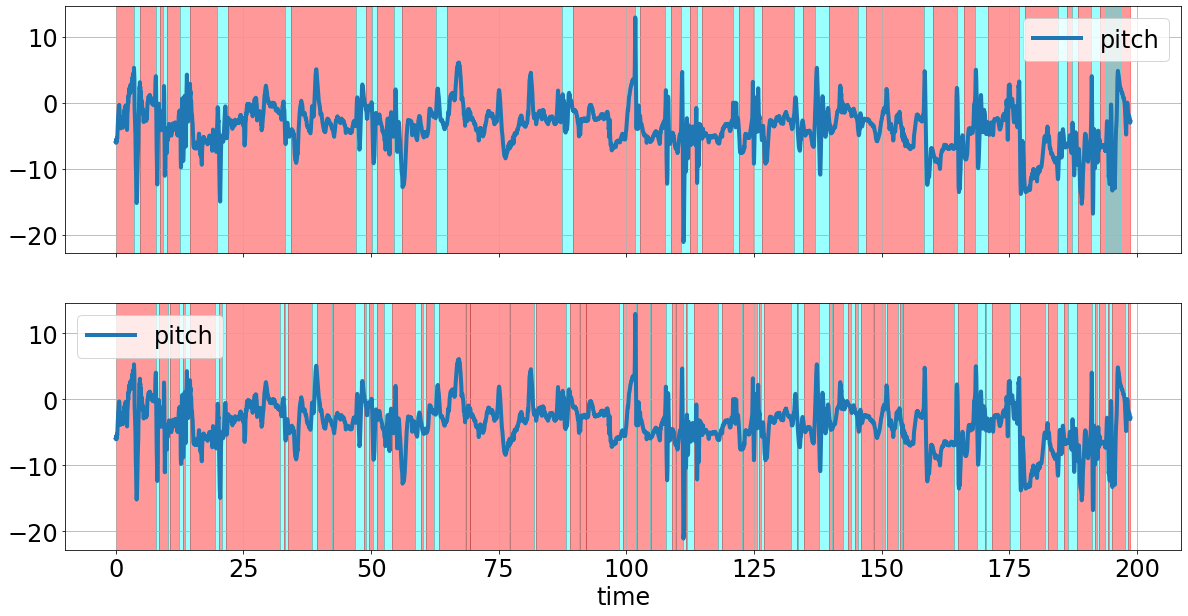

In [26]:
fig, ax = plt.subplots(2,1, figsize=(20,10), sharex=True)
# Gold Standard
pyr.set_index('time')[['pitch']].plot(ax=ax[0])
for i, x in rlnc.iterrows():
    color = 'cyan' if x.value == 'nod' else 'red'
    ax[0].axvspan(x.tmin, x.tmax, color = color, alpha=0.4)
# Predictions
pyr.set_index('time')[['pitch']].plot(ax=ax[1])
for i, x in e2c.iterrows():
    color = 'cyan' if x.prediction == 'nod' else 'red'
    ax[1].axvspan(x.tmin, x.tmax, color = color, alpha=0.4)

We can notice that with these parameters, prediction is always much shorter than real analysis.

## Evaluation

In [27]:
results = projectTimeIntervalsCharValues(results, rlabeled_nods, column_name="value")
results.head()


,time,pitch,prediction,value
0,0.00,-6.0161,no_nod,no_nod
1,0.04,-6.0734,no_nod,no_nod
2,0.08,-5.6150,no_nod,no_nod
3,0.12,-5.7296,no_nod,no_nod
4,0.16,-5.4431,no_nod,no_nod


In [28]:
results.value.value_counts()

no_nod    3826
nod       1142
Name: value, dtype: int64

In [29]:
pd.crosstab(results.value, results.prediction)

prediction,no_nod,nod
value,,
no_nod,3276,550
nod,595,547


In [30]:
print(classification_report(results.value, results.prediction, ['no_nod', 'nod']))

              precision    recall  f1-score   support

      no_nod       0.85      0.86      0.85      3826
         nod       0.50      0.48      0.49      1142

    accuracy                           0.77      4968
   macro avg       0.67      0.67      0.67      4968
weighted avg       0.77      0.77      0.77      4968



In [31]:
cohen_kappa_score(results.value, results.prediction, ['no_nod', 'nod'])

0.3399292905710085

## Experiments
* Evolution of accuracy with `nod_threshold`
* Trying various features => see which are the most promising + linear combination of features?
* Evaluating rule of thumb
* Are some 'no_nod' categories more difficult to predict?
* Evolution of accuracy with higher sigmas

In [32]:
use_index = True
column = 'pitch'
#for nod_threshold in [0.5, 0.7, 0.8, 0.85, 0.9, 0,92, 0.95, 0.99]:
#    dresult = compute2DArrayPredictor2Value(pyr, column, smin, smax, step, use_index = use_index)
#    createNodAnnotations(pyr, column, nod_threshold=0.945, use_index=True, dresults=dresult)
#    classification_report(results.value, results.prediction, ['no_nod', 'nod'], output_dict=True)